# Ocupação de escolas na cidade de Vitória - **ES**

### Atividade 1 - item 1 - Pós-graduação em Mineração de Dados - IFES - SERRA - ES
Distribuição da média de alunos por turma, 1º ao 9º ano, do Ensino Fundamental das dependências administrativas Federal, Estadual, Municipal, Privada e Pública do Município de Vitória/ES. O gráfico deve apresentar apenas o total de vagas por ano/série.

**Professor: Dr. Richard Junior Manuel Godinez Tello** \
**Aluno: Sandro Ricardo De Souza**

Descrição do exercício:

> O Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira (Inep) disponibiliza, por meio de sua página na web, indicadores educacionais, como a Média de Alunos por Turma. Faça o download da base de dados dos Municípios referente a 2023 (pode usar o arquivo ATU_MUNICIPIOS_2023.xlsx ou o ATU_MUNICIPIOS_2023.ods). Estes arquivos estão contidos num arquivo zip acessando o seguinte [link](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/indicadoreseducacionais/media-de-alunos-por-turma)

> Usando códigos em Python, elabore um gráfico que mostre a distribuição da média de alunos por turma (do 1º ao 9º ano incluindo a Turma Multietapa, Multi ou Correção de Fluxo, sendo todas estas do Ensino Fundamental) do Município de Vitória/ES. O gráfico deve apresentar apenas os dados de localização TOTAL (isto é, não use os dados de áreas urbanas ou rurais), nos cinco tipos de escola (Federal, Estadual, Municipal, Privada, Pública). Dica: seus dados de análise ficarão restritos a cinco linhas e dez colunas.

## Importações dos módulos necessários

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Leitura dos dados

A partir da planilha disponibilizada **ATU_MUNICIPIOS_2023.ods**, os dados foram tratados, usando o LibreOffice, para remoção de linhas e colunas desnecessárias, e convertido em arquivo CSV.

In [2]:
path_file = r'../../datasets/vitoria.csv'

In [3]:
# Lendo o dataframe
df = pd.read_csv(path_file, sep=";")

In [4]:
df

,Dependência Administrativa,1º Ano,2° ano,3° ano,4° ano,5° ano,6° ano,7° ano,8° ano,9° ano,TMMCF
0,Federal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Estadual,NaN,NaN,NaN,NaN,NaN,22.0,28.7,33.5,33.8,NaN
2,Municipal,21.2,21.7,22.6,23.8,23.2,26.7,26.0,26.0,23.8,NaN
3,Privada,17.4,19.6,19.9,20.8,22.1,26.1,26.1,26.9,29.0,NaN
4,Pública,21.2,21.7,22.6,23.8,23.2,26.6,26.0,26.2,25.0,NaN


## Remoção da coluna TMMCF

A coluna **TMMCF** trata das **T**urmas **M**ultietapa, **M**ulti ou **C**orreção de **F**luxo 2. No caso da cidade de Vitória, não há este tipo de turma.

In [5]:
# Remover a coluna 'TMMCF' pois não temos valores no exemplo dado
df = df.drop(columns=["TMMCF"], errors='ignore')

## Remoção da Dependência Administrativa Federal

Na cidade de Vitória, não há unidades educacionais da esfera federal nas séries/anos analizadas. Sendo assim, a dependência administrativa **Federal** foi removida.

In [6]:
# Remover no df a linha cuja Dependência Administrativa Federal
df = df[df["Dependência Administrativa"] != "Federal"]

In [7]:
df

,Dependência Administrativa,1º Ano,2° ano,3° ano,4° ano,5° ano,6° ano,7° ano,8° ano,9° ano
1,Estadual,NaN,NaN,NaN,NaN,NaN,22.0,28.7,33.5,33.8
2,Municipal,21.2,21.7,22.6,23.8,23.2,26.7,26.0,26.0,23.8
3,Privada,17.4,19.6,19.9,20.8,22.1,26.1,26.1,26.9,29.0
4,Pública,21.2,21.7,22.6,23.8,23.2,26.6,26.0,26.2,25.0


## Gráficos

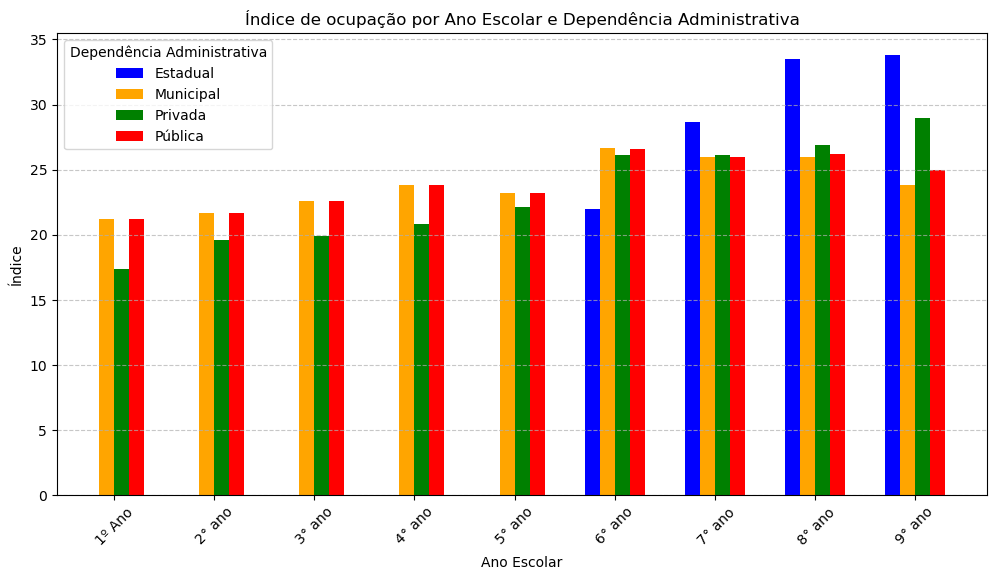

In [8]:
plt.figure(figsize=(12, 6))

# Definir as séries (anos escolares) no eixo X
anos = df.columns[1:]  # Ignorando a coluna de dependência
x = np.arange(len(anos))  # Posições no eixo X

# Largura das barras
largura = 0.15

# Criar um mapeamento de cores para cada dependência administrativa
cores = {
    "Estadual": "blue",
    "Municipal": "orange",
    "Privada": "green",
    "Pública": "red"
}

# Iterar sobre as dependências e plotar as barras
for i, dependencia in enumerate(["Estadual", "Municipal", "Privada", "Pública"]):
    valores = df[df["Dependência Administrativa"] == dependencia].iloc[:, 1:].values.flatten()
    plt.bar(x + i * largura, valores, width=largura, label=dependencia, color=cores[dependencia])

# Criar o gráfico

plt.xticks(x + largura * 1.5, anos, rotation=45)  # Ajustando as posições e rótulos
plt.xlabel("Ano Escolar")
plt.ylabel("Índice")
plt.title("Índice de ocupação por Ano Escolar e Dependência Administrativa")
plt.legend(title="Dependência Administrativa")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

O gráfico apresenta o agrupamento por ano escolar, do 1º ao 9º ano, e por dependência administrativa. Mas podemos melhorar dois aspectos: 

- Podemos separar em dois gráficos, um para uma coparação entre dependências estadual e municipal, e outra em privada e pública. Assim, poderemos destacar melhor o papel de cada um.
- Também podemos limitar o eixo y, em todos os gráficos, uma vez que as diferencias só começa a aparecer após o valor 15, nos índices. 

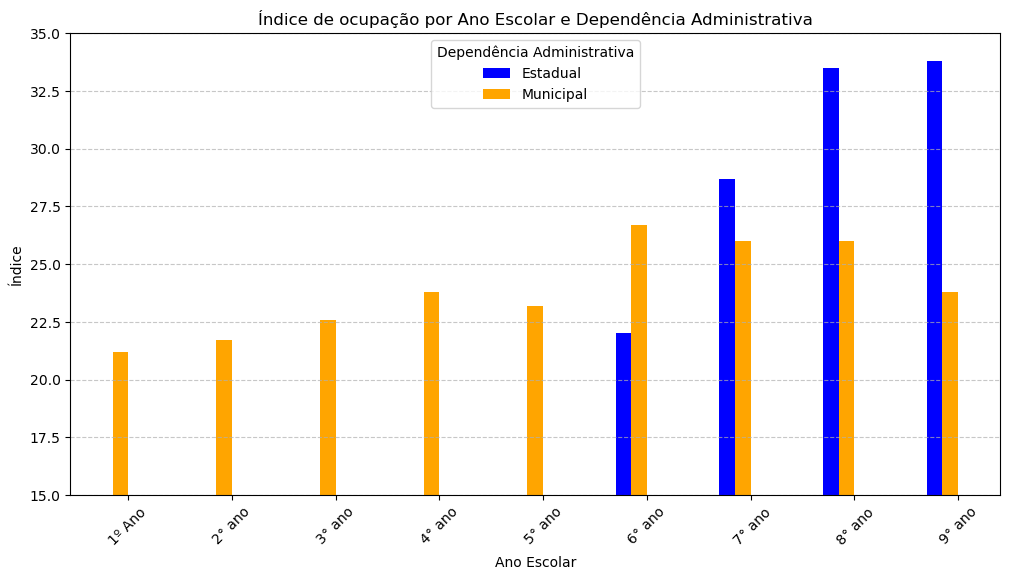

In [9]:
plt.figure(figsize=(12, 6))

# Definir as séries (anos escolares) no eixo X
anos = df.columns[1:]  # Ignorando a coluna de dependência
x = np.arange(len(anos))  # Posições no eixo X

# Largura das barras
largura = 0.15

# Criar um mapeamento de cores para cada dependência administrativa
cores = {
    "Estadual": "blue",
    "Municipal": "orange",
}

# Iterar sobre as dependências e plotar as barras
for i, dependencia in enumerate(["Estadual", "Municipal"]):
    valores = df[df["Dependência Administrativa"] == dependencia].iloc[:, 1:].values.flatten()
    plt.bar(x + i * largura, valores, width=largura, label=dependencia, color=cores[dependencia])

# Criar o gráfico
plt.xticks(x + largura * 1.5, anos, rotation=45)  # Ajustando as posições e rótulos
plt.xlabel("Ano Escolar")
plt.ylabel("Índice")
plt.title("Índice de ocupação por Ano Escolar e Dependência Administrativa")
plt.legend(title="Dependência Administrativa")
plt.ylim(15, 35)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

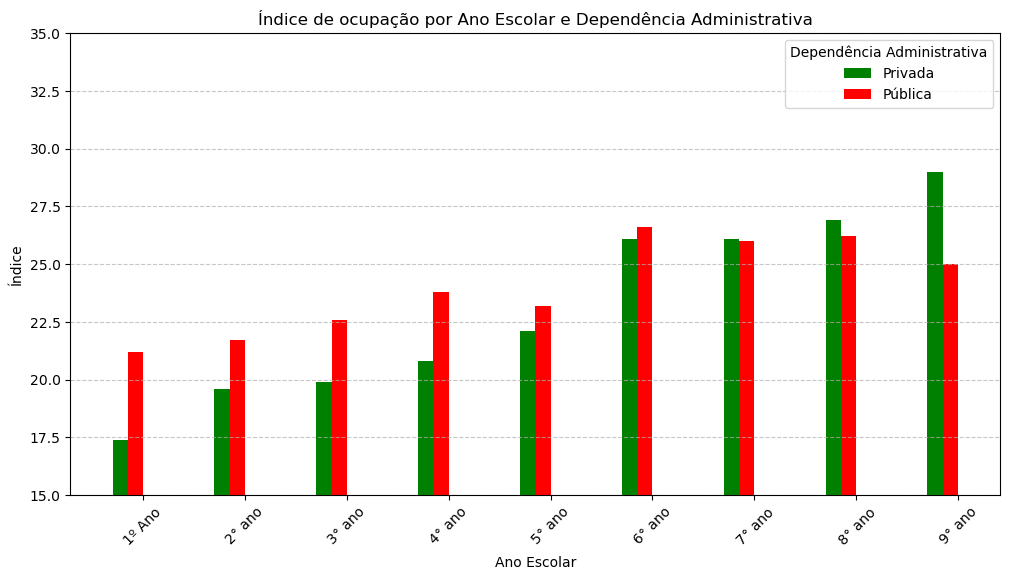

In [10]:
plt.figure(figsize=(12, 6))

# Definir as séries (anos escolares) no eixo X
anos = df.columns[1:]  # Ignorando a coluna de dependência
x = np.arange(len(anos))  # Posições no eixo X

# Largura das barras
largura = 0.15

# Criar um mapeamento de cores para cada dependência administrativa
cores = {
    "Privada": "green",
    "Pública": "red"
}

# Iterar sobre as dependências e plotar as barras
for i, dependencia in enumerate(["Privada", "Pública"]):
    valores = df[df["Dependência Administrativa"] == dependencia].iloc[:, 1:].values.flatten()
    plt.bar(x + i * largura, valores, width=largura, label=dependencia, color=cores[dependencia])

# Criar o gráfico
plt.xticks(x + largura * 1.5, anos, rotation=45)  # Ajustando as posições e rótulos
plt.xlabel("Ano Escolar")
plt.ylabel("Índice")
plt.title("Índice de ocupação por Ano Escolar e Dependência Administrativa")
plt.legend(title="Dependência Administrativa")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.ylim(15, 35)
plt.show()


## Alguns valores quantitativos

### Maior e menor índice por dependência administrativa

In [11]:
# Dicionário para armazenar os resultados
ocupacao_extremos = {}

# Iterar sobre cada dependência administrativa
for _, row in df.iterrows():
    dependencia = row["Dependência Administrativa"]
    menor_valor = row.iloc[1:].min()  # Menor valor da linha (ignorando a 1ª coluna)
    maior_valor = row.iloc[1:].max()  # Maior valor da linha (ignorando a 1ª coluna)
    
    # Armazenar no dicionário
    ocupacao_extremos[dependencia] = {"Menor Ocupação": menor_valor, "Maior Ocupação": maior_valor}

# Exibir resultados
for dependencia, valores in ocupacao_extremos.items():
    print(f"{dependencia}: Menor ocupação = {valores['Menor Ocupação']}, Maior ocupação = {valores['Maior Ocupação']}")

Estadual: Menor ocupação = 22.0, Maior ocupação = 33.8
Municipal: Menor ocupação = 21.2, Maior ocupação = 26.7
Privada: Menor ocupação = 17.4, Maior ocupação = 29.0
Pública: Menor ocupação = 21.2, Maior ocupação = 26.6


## Conclusão

A análise da distribuição da média de alunos por turma no Ensino Fundamental do município de Vitória/ES revelou algumas tendências relevantes sobre a ocupação das escolas conforme a dependência administrativa.  

1. **Tendência Geral de Ocupação**  
   - A ocupação das turmas nas escolas **municipais e públicas** segue um padrão similar, com médias de alunos por turma variando entre **21 e 26 alunos** ao longo dos anos escolares.  Isto pode estar relacionado a uma maior contribuição, no peso, das escolas municipais, quando se calcula as médias das escolas públicas. E, de fato, parece ser este o caso, já que esta dependência administrativa, em Vitória é quase que exclusivamente municipal.
   - Já nas escolas **privadas**, a ocupação tende a ser menor nos anos iniciais, mas aumenta gradativamente, chegando a um número maior de alunos por turma no ensino fundamental final.  

2. **Comparação entre as Escolas Estaduais e Municipais**  
   - As escolas **municipais** apresentam médias de alunos por turma relativamente estáveis entre os anos, variando de **21,2 no 1º ano para 26 no 7º e 8º anos, diminuindo no 9º ano para 23,8**.  
   - Já as escolas **estaduais**, que só aparecem a partir do 6º ano, apresentam médias **ligeiramente superiores**, com um aumento progressivo até **33,8 alunos no 9º ano**, indicando maior ocupação.  

3. **Comparação entre as Escolas Públicas e Privadas**  
   - As escolas **privadas** apresentam um padrão diferente das públicas: no início do Ensino Fundamental, possuem menos alunos por turma (**17,4 no 1º ano**), mas essa quantidade aumenta até **29 no 9º ano**.  
   - As escolas **públicas** mantêm uma média mais estável ao longo dos anos, mas ainda assim apresentam um leve aumento da ocupação nos anos finais (**de 21,2 no 1º ano para 26,2 no 9º ano**).  

4. **Destaques e Possíveis Implicações**  
   - A maior média de alunos por turma no Ensino Fundamental **final das escolas estaduais** pode indicar uma demanda maior por vagas ou falta de infraestrutura para manter turmas menores.  
   - O crescimento gradual da média de alunos nas **escolas privadas** sugere uma estratégia diferente de organização, podendo indicar turmas menores nos primeiros anos para um ensino mais individualizado, aumentando a ocupação nos anos finais.  
   - A estabilidade nas escolas **municipais e públicas** pode refletir um planejamento de vagas que busca manter um equilíbrio na ocupação das turmas.  

Essa análise demonstra a importância de considerar a distribuição da ocupação escolar ao planejar políticas educacionais, garantindo uma melhor organização das turmas e condições adequadas de ensino.